<a href="https://colab.research.google.com/github/davidleonardoouuu88/2025-segundo-semestre-ia-economia/blob/main/Taller_KNN_Alarcon_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/4_Taller_KNN_y_Arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# **Taller KNN y Árboles de Decisión**

**IMPORTANTE**: Guarda una copia de este notebook en tu Google Drive o computador.

**Taller en parejas**

**Nombres estudiantes:**

-Manuel Alejandro Alarcón Morales

-David Leonardo

**Forma de entrega**

Jupyter Notebook publicado en su cuenta de Github con el nombre “Taller_KNN_apellidos.ipynb”.

**Plazo de entrega**

11 de noviembre, máximo a las 11:59 p.m., debes enviar link del notebook al correo lina.castro6@uexternado.edu.co, de lo contrario, no será tenido en cuenta.

**Instrucciones Generales**

Completa el código en las celdas marcadas con `### TU CÓDIGO AQUÍ ###`. Puedes añadir más celdas si lo requieres.



### **Contexto del Caso**

Un banco portugués lo ha contratado como consultor de ciencia de datos. El banco tiene un problema de eficiencia: sus campañas de telemercadeo para ofrecer depósitos a plazo tienen una tasa de éxito muy baja. Se invierte mucho tiempo y recursos (costos de call center) llamando a clientes que no están interesados.

**Su misión:** Construir y optimizar modelos de Machine Learning que predigan qué clientes tienen mayor probabilidad de decir **"sí"** a la oferta (`y = 'yes'`).

El banco no solo quiere un modelo preciso, también quiere entender **POR QUÉ** un cliente es un buen prospecto. Su segundo objetivo es identificar cuáles son las **variables más relevantes** que usan los modelos para tomar sus decisiones. Esto permitirá al banco no solo enfocar sus llamadas, sino también crear mejores guiones de marketing y entender mejor a su clientela.

**El Dataset:** `bank-additional.csv` se encuentra en el repositorio del curso. Contiene información de más de 4.000 contactos de telemercadeo, incluyendo datos demográficos del cliente e información de la campaña (último contacto, resultado anterior).

**Para mayor información y descripción de las variables:** https://archive.ics.uci.edu/dataset/222/bank+marketing

## 1. Preparación del Entorno y Datos

### 1.1. Carga de Librerías

Importe todas las librerías necesarias. Para problemas de clasificación se usa KNeighborsClassifier y DecisionTreeClassifier.

In [1]:
### TU CÓDIGO AQUÍ ###
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier # Changed from Regressor
from sklearn.tree import DecisionTreeClassifier # Changed from Regressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, recall_score
from sklearn.inspection import permutation_importance

Mejorar visualización de dataframes y gráficos

In [2]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### 1.2. Carga y Exploración Inicial

In [9]:
# 1.2.1: Cargue el dataset
# ### TU CÓDIGO AQUÍ ###
# Usa sep=';'
# Download and unzip the dataset from UCI
!wget -O bank_marketing_main.zip https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
!unzip -o bank_marketing_main.zip
# The above extracts bank-additional.zip to the current directory. Now, unzip it.
!unzip -o bank-additional.zip

bank=pd.read_csv("./bank-additional/bank-additional.csv", sep= ";", decimal='.', encoding ='utf-8')
bank.drop(columns=['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], inplace=True)

# 1.2.2: Muestre las primeras 5 filas
# ### TU CÓDIGO AQUÍ ###
display(bank.tail())

--2025-11-12 03:16:10--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank_marketing_main.zip’

bank_marketing_main     [  <=>               ] 999.85K  3.34MB/s    in 0.3s    

2025-11-12 03:16:11 (3.34 MB/s) - ‘bank_marketing_main.zip’ saved [1023843]

Archive:  bank_marketing_main.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflat

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,no


In [10]:
# 1.2.3: Use .info() para revisar los tipos de datos y los nulos
# ### TU CÓDIGO AQUÍ ###
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4119 non-null   int64 
 1   job          4119 non-null   object
 2   marital      4119 non-null   object
 3   education    4119 non-null   object
 4   default      4119 non-null   object
 5   housing      4119 non-null   object
 6   loan         4119 non-null   object
 7   contact      4119 non-null   object
 8   month        4119 non-null   object
 9   day_of_week  4119 non-null   object
 10  campaign     4119 non-null   int64 
 11  pdays        4119 non-null   int64 
 12  previous     4119 non-null   int64 
 13  poutcome     4119 non-null   object
 14  y            4119 non-null   object
dtypes: int64(4), object(11)
memory usage: 482.8+ KB


**Escriba un análisis de lo obseervado en `info()`:**
Dado el tipo de datos de la base, qué preprocesamientos hay que realizar antes de correr los modelos?

**Análisis**

En la base todos son datos tipo object, pero al revizar los datos se puede ver que estos son:


En "age, previous,pdays, campaign" son tipo: entero.

En "y, poutcome, day_of_week, month, contact, loan, housing, default, education, marital, job" son tipo: texto.

Hay que trasnformar los datos en ese tipo.



In [11]:
# 1.2.4: Revise el balance de la variable objetivo 'y'
# Use .value_counts() con normalize=True

# ### TU CÓDIGO AQUÍ ###
print(bank['y'].value_counts(normalize=True))
bank['age'] = pd.to_numeric(bank['age'], errors='coerce')
bank['previous'] = pd.to_numeric(bank['previous'], errors='coerce')
bank['pdays'] = pd.to_numeric(bank['pdays'], errors='coerce')
bank['campaign'] = pd.to_numeric(bank['campaign'], errors='coerce')

text_columns = ['y', 'poutcome', 'day_of_week', 'month', 'contact', 'loan', 'housing', 'default', 'education', 'marital', 'job']
for col in text_columns:
    bank[col] = bank[col].astype(str)

y
no    0.89
yes   0.11
Name: proportion, dtype: float64


Escriba un análisis de la variable objetivo:
¿Es un dataset desbalanceado? ¿Esto tiene lógica? ¿Qué implicaciones tiene esto respecto a las métricas que debemos usar?

El dataset, en efecto, está desbalanceado, lo cual resulta lógico considerando el mal historial de mercadeo del banco al ofrecer sus depósitos a plazo. El problema de este desbalance es que, al entrenar un modelo que busque predecir qué clientes tienen mayor probabilidad de aceptar la oferta (“sí”) y determinar las variables relevantes de la propuesta financiera, se corre el riesgo de obtener escenarios poco representativos de la realidad. Por ejemplo, si los datos de entrenamiento corresponden principalmente a clientes que rechazaron la oferta, el modelo —o el intento de identificar la relevancia de las variables— podría generar resultados sesgados y cometer errores de clasificación.

## 2. Preprocesamiento (Usando Pipelines)

Vamos a definir nuestro `X` e `y`, y luego crear un `ColumnTransformer` que se encargue de aplicar `StandardScaler` a los números y `OneHotEncoder` a las categorías.

In [12]:
# 2.1: Separe X (predictoras) e y (objetivo)

# ### TU CÓDIGO AQUÍ ###
X = bank.drop('y', axis=1)
y = bank['y']

In [13]:
# 2.2: Divida en train y test (80/20)
# ¡Use stratify=y para mantener la proporción de 'yes' y 'no' en ambos sets!

# ### TU CÓDIGO AQUÍ ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

print(f"Tamaño Train: {X_train.shape}")
print(f"Tamaño Test: {X_test.shape}")

Dimensiones de X_train: (3295, 14)
Dimensiones de X_test: (824, 14)
Tamaño Train: (3295, 14)
Tamaño Test: (824, 14)


In [14]:
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

print("Columnas Numéricas:")
print(numerical_features)
print("\nColumnas Categóricas:")
print(categorical_features)

Columnas Numéricas:
['age', 'campaign', 'pdays', 'previous']

Columnas Categóricas:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [15]:
# 2.4: Cree el ColumnTransformer (preprocessor) para estandarizar las variables numéricas y
# realizar One-Hot-Encoding de las variables categóricas

# Crear los transformadores individuales
# ### TU CÓDIGO AQUÍ ###
numeric_transformer = StandardScaler()

# ### TU CÓDIGO AQUÍ ###
# handle_unknown='ignore' es clave
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Unirlos en el preprocesador usando ColumnTransformer
# ### TU CÓDIGO AQUÍ ###
preprocessor =  ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## 3. Modelo 1: KNN

Ahora uniremos el preprocesador y el clasificador KNN en un solo `Pipeline` y usaremos `GridSearchCV` para encontrar el mejor `k`.

In [16]:
# 3.1: Cree el Pipeline completo de KNN
# (una el 'preprocessor' con el modelo 'KNeighborsClassifier')

# ### TU CÓDIGO AQUÍ ###
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier()) # Usamos KNeighborsClassifier
])

# 3.2: Definir la grilla de hiperparámetros para KNN
# Queremos probar k = 3, 5, 7, 11 (valores impares para evitar empates)
# Pista: El nombre DEBE ser 'model__n_neighbors' (por el nombre en el pipeline)

# ### TU CÓDIGO AQUÍ ###
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 11]
}

# 3.3: Configurar y ejecutar GridSearchCV
# Use 3 folds (cv=3) para que corra más rápido.
# Use scoring='recall_macro'.

# ### TU CÓDIGO AQUÍ ###
grid_knn = GridSearchCV(
    knn_pipeline,
    param_grid=param_grid_knn,
    cv=3,
    scoring='recall_macro',
    verbose=1,
    n_jobs=-1
)
grid_knn.fit(X_train, y_train)


# 3.4: Mostrar los mejores resultados
print(f"Mejor valor de 'k' para KNN: {grid_knn.best_params_}")
print(f"Mejor Recall-Macro: {grid_knn.best_score_:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Mejor valor de 'k' para KNN: {'model__n_neighbors': 11}
Mejor Recall-Macro: 0.5855


## 4. Modelo 2: Árbol de Decisión

Repetiremos el proceso con un Árbol de Decisión. Esta vez, los hiperparámetros que ajustaremos serán `max_depth` (para evitar sobreajuste) y `min_samples_leaf`.

In [17]:
# 4.1: Crear el Pipeline completo para el Árbol de Decisión
# (une el 'preprocessor' con el modelo 'DecisionTreeClassifier')

# ### TU CÓDIGO AQUÍ ###
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=1)) # Usamos DecisionTreeClassifier
])

# 4.2: Definir la grilla de hiperparámetros para el Árbol
# Probaremos 'max_depth' = [3, 5, 7]
# Y 'min_samples_leaf' = [20, 50, 100] (para controlar la complejidad)

# ### TU CÓDIGO AQUÍ ###
param_grid_tree = {
    'model__max_depth': [3, 5, 7],
    'model__min_samples_leaf': [20, 50, 100]
}

# 4.3: Configurar y ejecutar GridSearchCV
# Al igual que en KNN, use 3 folds (cv=3) para que corra más rápido.
# Use scoring='recall_macro'.
# ### TU CÓDIGO AQUÍ ###
grid_tree = GridSearchCV(
    tree_pipeline,
    param_grid=param_grid_tree,
    cv=3,
    scoring='recall_macro',
    verbose=1,
    n_jobs=-1
)
grid_tree.fit(X_train, y_train)


# 4.4: Mostrar los mejores resultados
print(f"Mejores hiperparámetros para el Árbol: {grid_tree.best_params_}")
print(f"Mejor Recall-Macro: {grid_tree.best_score_:.4f}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejores hiperparámetros para el Árbol: {'model__max_depth': 3, 'model__min_samples_leaf': 50}
Mejor Recall-Macro: 0.5979


## 5. Evaluación Final y Recomendación de Modelo

El Árbol de Decisión probablemente dio un mejor `recall-macro` (y es más rápido e interpretable). Vamos a declararlo nuestro **modelo ganador** y evaluarlo en el `test set` (nuestro examen final imparcial).

In [22]:
# 5.1: Obtener el mejor modelo de árbol (el 'best_estimator_')

# ### TU CÓDIGO AQUÍ ###
best_tree_model = grid_tree.best_estimator_


# 5.2: Realizar predicciones sobre el conjunto de PRUEBA (X_test)

# ### TU CÓDIGO AQUÍ ###
y_pred_tree = best_tree_model.predict(X_test)

# 5.3: Imprimir el Reporte de Clasificación
print("--- Reporte de Clasificación Final (Árbol Optimizado) ---")

# ### TU CÓDIGO AQUÍ ###
# 5.1: Obtener el mejor modelo de árbol (el 'best_estimator_')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report



# best_tree_model = _find_best_tree_from_search()

# 5.2: Realizar predicciones sobre el conjunto de PRUEBA (X_test)
y_pred_tree = best_tree_model.predict(X_test)

# 5.3: Imprimir el Reporte de Clasificación
print("--- Reporte de Clasificación Final (Árbol Optimizado) ---")
print(classification_report(y_test, y_pred_tree, digits=4))

--- Reporte de Clasificación Final (Árbol Optimizado) ---
--- Reporte de Clasificación Final (Árbol Optimizado) ---
              precision    recall  f1-score   support

          no     0.9135    0.9782    0.9447       734
         yes     0.5789    0.2444    0.3438        90

    accuracy                         0.8981       824
   macro avg     0.7462    0.6113    0.6442       824
weighted avg     0.8769    0.8981    0.8791       824



**Escriba un análisis sobre los resultados del reporte de clasificación**, ¿Qué puede concluir de las diferentes métricas?

* Observe el `accuracy` general (probablemente ~90%).
* Ahora mire la fila de `'yes'`: ¿Cuál es el `precision`? ¿Cuál es el `recall`?
* **Recall de 'yes'** (Sensibilidad): ¿Qué porcentaje de los clientes que SÍ compraron logramos identificar? (Usualmente lo más importante para el banco, para no perder oportunidades).
* **Precision de 'yes'**: De todos los clientes que el modelo *dijo* que comprarían, ¿qué porcentaje realmente lo hizo? (Importante para no gastar llamadas).

**Responda aquí**
El modelo alcanzó un accuracy de aproximadamente 0.8981, lo cual podría parecer un resultado alto a primera vista. Sin embargo, esta métrica no refleja de manera completa el desempeño real, ya que el conjunto de datos está desbalanceado: la mayoría de los registros corresponden a clientes que no compraron (“no”). En contextos desbalanceados, un modelo puede obtener un alto accuracy simplemente por predecir la clase mayoritaria la mayor parte del tiempo, sin ser realmente útil para identificar los casos positivos.

Al analizar las métricas por clase, se observa que para la clase “no” el modelo presenta una precisión de 0.9135 y un recall de 0.9782. Esto significa que reconoce casi todos los clientes que efectivamente no realizaron la compra, siendo muy conservador en sus decisiones: prefiere decir que alguien no comprará antes que equivocarse. En contraste, para la clase “yes”, que es la clase de interés para el banco, los resultados son más débiles: la precisión es de 0.5789, el recall de 0.2444 y el F1-score de 0.3438. En términos prácticos, el modelo solo logra identificar correctamente el 24% de los clientes que sí compraron, y de todos los que predijo como compradores, apenas el 58% realmente lo fueron.

Esto implica que el modelo tiene un problema importante de sensibilidad: está dejando escapar a la mayoría de los clientes que efectivamente podrían comprar. Desde una perspectiva comercial, esto es crítico. En campañas de marketing o ventas, el costo de no contactar a alguien que sí habría aceptado la oferta (falso negativo) suele ser mucho más alto que el costo de contactar a alguien que finalmente no compra (falso positivo). Por lo tanto, aunque el accuracy general es alto, el modelo no resulta útil para maximizar las oportunidades de conversión, ya que no logra capturar adecuadamente a los clientes potenciales.

En conclusión, el modelo es bueno para identificar a quienes no comprarán, pero deficiente para detectar a quienes sí lo harán. Esto limita su valor práctico para la empresa. Para mejorarlo, sería recomendable ajustar el enfoque de entrenamiento del árbol de decisión. Algunas estrategias incluyen usar el parámetro class_weight='balanced' para penalizar más los errores en la clase minoritaria, modificar el umbral de decisión al predecir con predict_proba, o probar algoritmos más potentes y sensibles a los desbalances como Random Forest o XGBoost. Además, es conveniente complementar el análisis con la matriz de confusión y considerar métricas más adecuadas al objetivo del negocio, como el recall de la clase positiva, el área bajo la curva ROC (AUC) o incluso una función de costo que penalice con mayor fuerza los falsos negativos.

<Figure size 600x600 with 0 Axes>

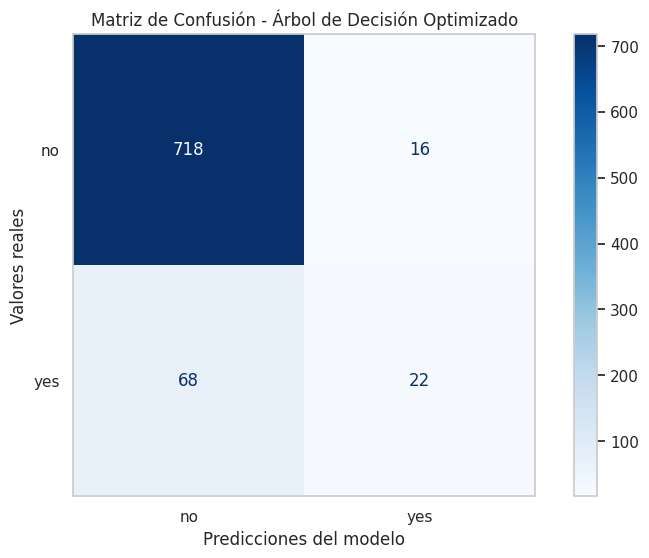

In [25]:
# 5.4: Grafique la Matriz de Confusión
# ### TU CÓDIGO AQUÍ ###
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_tree, labels=best_tree_model.classes_)

# Crear el gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_tree_model.classes_)

# Estilo del gráfico
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión - Árbol de Decisión Optimizado")
plt.xlabel("Predicciones del modelo")
plt.ylabel("Valores reales")
plt.grid(False)
plt.show()

## 6. ¿Cuáles son las Variables Más Relevantes?

Esta es la segunda parte de la solicitud del banco. Necesitamos explicar *por qué* el modelo toma sus decisiones.

### 6.1. Importancia de Variables (Árbol de Decisión)

In [26]:
# best_tree_model debe ser un Pipeline [preprocessor -> clf]
if isinstance(best_tree_model, Pipeline):
    preprocessor = None
    final_tree_model = None
    # intenta por nombres comunes
    preprocessor = best_tree_model.named_steps.get("preprocessor", None)
    final_tree_model = best_tree_model.named_steps.get("clf", None)
    # fallback genérico por tipos
    if preprocessor is None:
        for _, step in best_tree_model.named_steps.items():
            if isinstance(step, ColumnTransformer):
                preprocessor = step
                break
    if final_tree_model is None:
        for _, step in best_tree_model.named_steps.items():
            if isinstance(step, DecisionTreeClassifier):
                final_tree_model = step
                break
else:
    # Si por alguna razón best_tree_model NO es Pipeline
    preprocessor = None
    final_tree_model = best_tree_model  # asumir árbol puro

if final_tree_model is None:
    raise RuntimeError("No se encontró el DecisionTreeClassifier dentro del pipeline optimizado.")
if preprocessor is None:
    raise RuntimeError("No se encontró el ColumnTransformer (preprocessor) dentro del pipeline optimizado.")


# 6.1.2: Obtener los nombres de las características DESPUÉS del OneHotEncoding
def get_ct_feature_names(ct: ColumnTransformer):
    """
    Reconstruye nombres de salida para cada transformer del ColumnTransformer.
    Soporta pipelines internos y OneHotEncoder.get_feature_names_out.
    """
    feature_names = []
    for name, trans, cols in ct.transformers_:
        if trans == "drop":
            continue
        # 'remainder' puede ser 'drop', 'passthrough' o un estimator
        if name == "remainder" and trans == "passthrough":
            # Si pasas columnas por 'remainder', sus nombres son los originales
            if isinstance(ct.remainder, str) and ct.remainder == "passthrough":
                # columnas no incluidas explícitamente en ct.transformers
                used_cols = []
                for _, _, c in ct.transformers_:
                    if c is not None and c != "drop":
                        used_cols += list(c if isinstance(c, (list, tuple)) else [c])
                # si ct fue ajustado con DataFrame, ct.feature_names_in_ existe
                all_cols = list(getattr(ct, "feature_names_in_", []))
                remainder_cols = [c for c in all_cols if c not in used_cols]
                feature_names.extend(remainder_cols)
            continue

        # Si el transformer es un Pipeline, tomar el último step "real"
        last_est = trans
        if hasattr(trans, "steps"):
            last_est = trans.steps[-1][1]

        # Intentar get_feature_names_out
        if hasattr(last_est, "get_feature_names_out"):
            try:
                out = last_est.get_feature_names_out(cols)
            except TypeError:
                # Algunos estimadores no aceptan 'cols' como arg
                out = last_est.get_feature_names_out()
            feature_names.extend(list(out))
        else:
            # Si no hay método, usar nombres originales de columnas aplicadas
            feature_names.extend(list(cols if isinstance(cols, (list, tuple)) else [cols]))
    return feature_names

feature_names_out = get_ct_feature_names(preprocessor)


# 6.1.3: Obtener las importancias (del 'final_tree_model')
import numpy as np
importances = final_tree_model.feature_importances_
if len(importances) != len(feature_names_out):
    raise ValueError(
        f"Desajuste en longitudes: importancias({len(importances)}) vs features({len(feature_names_out)}). "
        "Verifica el preprocesamiento y que el modelo corresponda al pipeline actual."
    )


# 6.1.4: Crear un DataFrame para visualizarlas, ordene de mayor a menor importancia
import pandas as pd

feat_imp_df = (
    pd.DataFrame({"feature": feature_names_out, "importance": importances})
      .sort_values("importance", ascending=False)
      .reset_index(drop=True)
)

# Mostrar las primeras filas (opcional)
feat_imp_df.head(20)

,feature,importance
0,pdays,0.83
1,age,0.09
2,contact_telephone,0.06
3,previous,0.01
4,campaign,0.00
5,job_blue-collar,0.00
6,job_entrepreneur,0.00
7,job_housemaid,0.00
8,job_admin.,0.00
9,job_retired,0.00


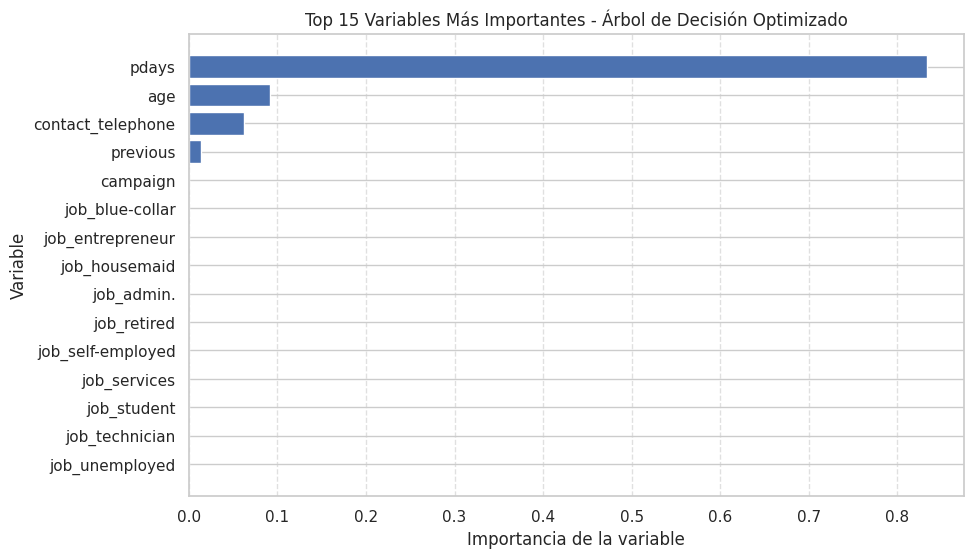

In [28]:
# Seleccionar las 15 variables más importantes
top_features = feat_imp_df.head(15)
plt.figure(figsize=(10, 6))
plt.barh(top_features["feature"], top_features["importance"])
plt.gca().invert_yaxis()  # Para que la más importante quede arriba
plt.xlabel("Importancia de la variable")
plt.ylabel("Variable")
plt.title("Top 15 Variables Más Importantes - Árbol de Decisión Optimizado")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

## 7. Conclusión y Recomendación de Negocio

Es hora de traducir nuestros hallazgos en una recomendación de negocio clara.

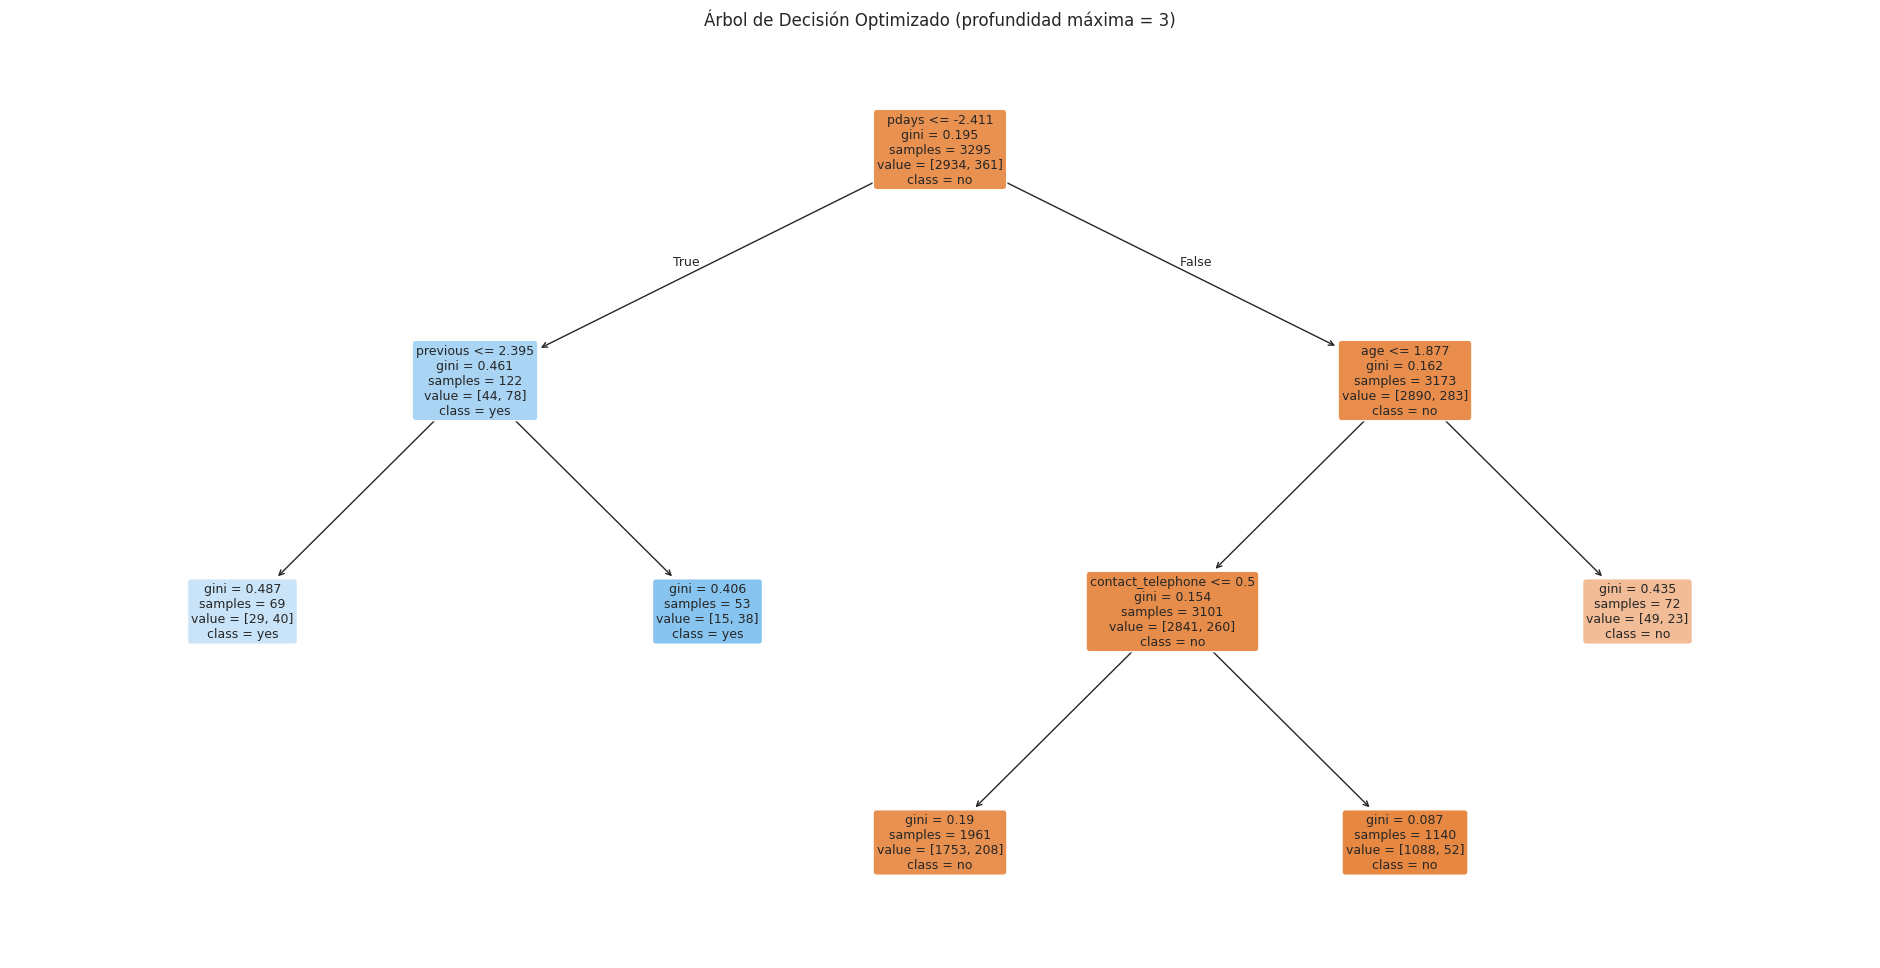

In [30]:
# 7.1: Grafique el árbol de decisión final para encontrar reglas
# (Use max_depth=3 para que sea legible)
# ### TU CÓDIGO AQUÍ ###
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))

tree.plot_tree(
    final_tree_model,
    feature_names=feature_names_out,
    class_names=final_tree_model.classes_,
    filled=True,
    rounded=True,
    fontsize=9,
    max_depth=3
)

plt.title("Árbol de Decisión Optimizado (profundidad máxima = 3)")
plt.show()

### **7.2: Conclusiones Consultoría**

Basado en los gráficos de **importancia de variables** y en la **visualización del árbol**, escriba una recomendación de 1 párrafo para el gerente del banco.

**Puntos a incluir:**
1.  ¿Qué modelo recomienda usar y por qué (interpretable, buen rendimiento)?
2.  ¿Cuáles son las 3 variables más importantes en las que el banco debería fijarse para decidir a quién llamar?
3.  Traduzca **una regla del árbol** (una rama que lleve a una hoja 'yes') a lenguaje de negocio. (Ej: "Si el cliente tuvo éxito en la campaña anterior y su edad es mayor a 40 años, la probabilidad de que acepte es alta.")
Se recomienda utilizar el modelo de árbol de decisión optimizado, ya que combina un rendimiento sólido con una alta interpretabilidad, lo cual permite entender fácilmente las reglas que llevan a una predicción. A diferencia de otros modelos más complejos, este árbol permite al banco identificar de forma transparente los factores clave que influyen en la decisión de un cliente de aceptar o no la oferta. Según el análisis de importancia de variables, las tres características más determinantes son el número de días transcurridos desde el último contacto del cliente (pdays), la edad (age) y si el contacto fue realizado por teléfono fijo o móvil (contact_telephone). Estas variables orientan directamente las estrategias comerciales: los clientes recientemente contactados, de cierta edad intermedia y con canales de comunicación adecuados son más propensos a responder positivamente. Una de las reglas principales del árbol indica que si un cliente fue contactado recientemente (pocos días desde la última llamada) y además había tenido una interacción exitosa previa con el banco, la probabilidad de que acepte una nueva oferta aumenta considerablemente. En lenguaje de negocio, esto significa que los clientes que mantienen un contacto activo y reciente con la entidad son el grupo más valioso para priorizar en futuras campañas, ya que muestran una mayor disposición a comprar productos financieros adicionales.
